In [34]:
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

In [35]:
path = "Dataset//DatasetA//face-1.jpg"
image = np.array(Image.open(path))

In [36]:
avg_kernels = [np.ones((3, 3)), np.ones((5, 5)), np.ones((7, 7)), np.ones((13, 13))]

In [37]:
def convolution (image, kernel):
    step = math.floor(kernel.shape[0]/2)
    reshape_factor = step * 2
    kernel_height, kernel_width = kernel.shape[0],kernel.shape[1]
    
    new_image = np.zeros((image.shape[0] + reshape_factor, image.shape[1] + reshape_factor, image.shape[2]))
    new_image[step:new_image.shape[0]-step, step:new_image.shape[1]-step,:] = image
    output = np.zeros((image.shape))
    
    for k in range(output.shape[2]):
        for i in range(output.shape[0]):
            i_start, i_stop = i, i+kernel_height
            for j in range(output.shape[1]):
                j_start, j_stop = j, j+kernel_width

                if i_start >= 0 and j_start>=0 and i_stop < new_image.shape[0] and j_stop < new_image.shape[1]:
                    multipication = np.multiply(new_image[i_start:i_stop, j_start:j_stop, k], kernel) 
                    output[i, j, k] = np.sum(multipication)/(kernel.shape[0]**2)
#                 else:
#                   output[i, j, k] = new_image[i,j,k]
#                     print(i_stop, j_stop)
    
    print("image finished!")
    return output

In [38]:
# plt.imshow(Image.fromarray((convolution(image, avg_kernels[0])).astype(np.uint8)))

image finished!
image finished!
image finished!
image finished!


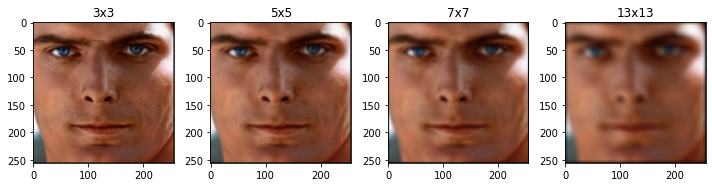

In [39]:
outputs = []
titles = ["3x3", "5x5", "7x7", "13x13"]

for kernel in avg_kernels:
    outputs.append(Image.fromarray((convolution(image, kernel)).astype(np.uint8)))
    
fig, axes = plt.subplots(1, 4, figsize=(10, 10))



for j in range(4):


    axes[j].imshow(outputs[j])
    axes[j].set_title(titles[j])

# Adjust the layout
plt.tight_layout()
# Show the figure
plt.show()

# plt.imshow(Image.fromarray((output).astype(np.uint8)))

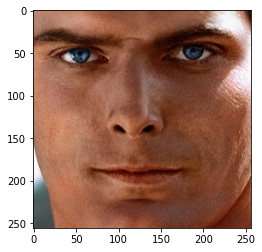

In [40]:
plt.imshow(image)

In [41]:
for i in range(len(outputs)):
    outputs[i].save("convs/"+ "faces-1" + titles[i] + ".png")